   nodes  interval  blocksize   SBR  throughput
3      1       100     535000  0.00     5599.75
1      1       800     535000  0.00      697.07
0      8       100     535000  0.75      686.09
2      8       800     535000  0.59      265.07


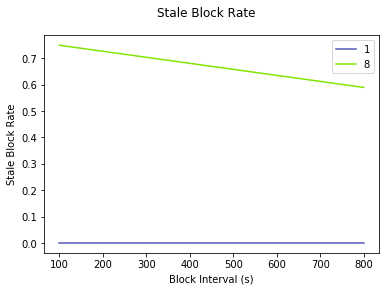

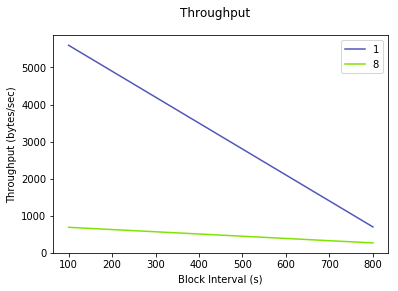

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os

DATA = "./data/data.csv"
df = pd.read_csv(DATA)
df = df.sort_values(['nodes', 'interval'])
print(df)

netsizes = list(df["nodes"].unique())
#repeats = df["Run Index"].unique()
repeats = [1]
number_of_colors = len(netsizes)

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]

# plot Stale Block Rate
fig, ax = plt.subplots()
fig.suptitle("Stale Block Rate")
for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['nodes'] == size]
        subset.plot(x="interval", y="SBR", ax=ax, label=str(size), color=color)
ax.set(xlabel="Block Interval (s)", ylabel="Stale Block Rate")

# plot Throughput 
fig, ax = plt.subplots()
fig.suptitle("Throughput")
for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['nodes'] == size]
        subset.plot(x="interval", y="throughput", ax=ax, label=str(size), color=color)
ax.set(xlabel="Block Interval (s)", ylabel="Throughput (bytes/sec)")

#fig = ax.get_figure()
#fig.savefig("/Users/amiecorso/Desktop/exp1-" + str(netsize) + ".pdf")

plt.show()
